**Install required packages**

In [ ]:
!pip install wbgapi squarify

**Import libraries**

In [ ]:
import wbgapi as wb
import pandas as pd
import squarify
import plotly.express as px
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.ticker import FuncFormatter


**Data Collection: Collecting the data for all the countries in the G7 and the BRICS groups using the World Bank API**

In [ ]:
wb.series.info()    # To get the id of the indicators

In [ ]:
indicators = ["SP.POP.TOTL", "NY.GDP.MKTP.CD", "NY.GDP.MKTP.PP.CD", "NY.GDP.PCAP.CD", "NY.GDP.PCAP.PP.CD", "TX.VAL.MRCH.CD.WT"]
g7_countries = ['DEU', 'FRA', 'ITA', 'GBR', 'USA', 'JPN', 'CAN']
brics_countries = ['BRA', 'RUS', 'IND', 'CHN', 'ZAF']
years = range(1992, 2023, 3)


In [ ]:
def collect_data(indicators, countries, years):
    """
    Collect data for specified indicators, countries, and years using the World Bank API.

    Args:
        indicators (list): List of indicator codes.
        countries (list): List of country codes.
        years (list): List of years.

    Returns:
        pd.DataFrame: A DataFrame containing the collected data.
    """
    data = wb.data.DataFrame(indicators, countries, time=years, numericTimeKeys=True, labels=True, columns='series')
    return data

In [ ]:
data_G7 = collect_data(indicators, g7_countries, years)
data_BRICS = collect_data(indicators, brics_countries, years)

**Pre-processing and formatting the data**

In [ ]:
def preprocess_data(data, column_mapping):
    """
    Preprocess the collected data by renaming columns and sorting.

    Args:
        data (pd.DataFrame): The raw data.
        column_mapping (dict): Mapping of old column names to new column names.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """
    data.rename(columns=column_mapping, inplace=True)
    data = data.sort_values(by=['Country', 'Time'], ascending=[True, True])
    data.reset_index(drop=True, inplace=True)
    return data


In [ ]:
# Define column mappings
column_mapping = {
    "SP.POP.TOTL": "Population",
    "NY.GDP.MKTP.CD": "Nominal_GDP",
    "NY.GDP.MKTP.PP.CD": "PPP_GDP",
    "NY.GDP.PCAP.CD": "Nominal_GDP_Per_Capita",
    "NY.GDP.PCAP.PP.CD": "GDP_PPP_Per_Capita",
    "TX.VAL.MRCH.CD.WT": "Total_Exports"
}

# Preprocess data
data_G7 = preprocess_data(data_G7, column_mapping)
data_BRICS = preprocess_data(data_BRICS, column_mapping)

In [ ]:
data_G7

,Country,Time,Nominal_GDP,PPP_GDP,Nominal_GDP_Per_Capita,GDP_PPP_Per_Capita,Population,Total_Exports
0,Canada,1992,5.943761e+11,5.851914e+11,20949.933265,20626.202059,28371264.0,1.344350e+11
1,Canada,1995,6.059410e+11,6.881836e+11,20678.950442,23485.641928,29302311.0,1.921970e+11
2,Canada,1998,6.339977e+11,7.936743e+11,21024.509932,26319.674164,30155173.0,2.143270e+11
3,Canada,2001,7.389627e+11,9.377868e+11,23821.445587,30230.802966,31020902.0,2.598580e+11
4,Canada,2004,1.026690e+12,1.083609e+12,32143.681408,33925.706732,31940655.0,3.167620e+11
...,...,...,...,...,...,...,...,...
72,United States,2010,1.504896e+13,1.504896e+13,48650.643128,48650.643128,309327143.0,1.278495e+12
73,United States,2013,1.684319e+13,1.684319e+13,53291.127689,53291.127689,316059947.0,1.579593e+12
74,United States,2016,1.869511e+13,1.869511e+13,57866.744934,57866.744934,323071755.0,1.451011e+12
75,United States,2019,2.138098e+13,2.138098e+13,65120.394663,65120.394663,328329953.0,1.643161e+12


In [ ]:
data_BRICS

,Country,Time,Nominal_GDP,PPP_GDP,Nominal_GDP_Per_Capita,GDP_PPP_Per_Capita,Population,Total_Exports
0,Brazil,1992,3.905666e+11,1.059682e+12,2505.225033,6797.153941,1.559008e+08,3.579300e+10
1,Brazil,1995,7.693333e+11,1.309440e+12,4704.961546,8008.058930,1.635153e+08,4.650600e+10
2,Brazil,1998,8.637110e+11,1.454471e+12,5049.766120,8503.697887,1.710398e+08,5.114000e+10
3,Brazil,2001,5.599837e+11,1.640062e+12,3142.235528,9202.876484,1.782119e+08,5.828700e+10
4,Brazil,2004,6.692893e+11,1.922557e+12,3623.223905,10407.839352,1.847220e+08,9.667800e+10
5,Brazil,2007,1.397114e+12,2.389039e+12,7323.190340,12522.515939,1.907795e+08,1.598160e+11
6,Brazil,2010,2.208838e+12,2.798925e+12,11249.293741,14254.519770,1.963535e+08,2.004340e+11
7,Brazil,2013,2.472819e+12,3.133894e+12,12258.564849,15535.723765,2.017218e+08,2.325440e+11
8,Brazil,2016,1.795693e+12,2.939094e+12,8680.735421,14208.161105,2.068596e+08,1.795260e+11
9,Brazil,2019,1.873288e+12,3.241960e+12,8845.323931,15307.941235,2.117829e+08,2.211270e+11


In [ ]:
def group_and_aggregate(data, time_column, aggregate_columns):
    """
    Group and aggregate data based on time and specified columns.

    Args:
        data (pd.DataFrame): The data to be aggregated.
        time_column (str): The time column for grouping.
        aggregate_columns (dict): Columns to be aggregated.

    Returns:
        pd.DataFrame: Aggregated DataFrame.
    """
    grouped_data = data.groupby(time_column).agg(aggregate_columns)
    return grouped_data

In [ ]:
g7_aggregated = group_and_aggregate(data_G7, 'Time', {
    'Population': 'sum',
    'Nominal_GDP': 'sum',
    'Nominal_GDP_Per_Capita': 'mean',
    'PPP_GDP': 'sum',
    'GDP_PPP_Per_Capita': 'mean',
    'Total_Exports': 'sum'
})

brics_aggregated = group_and_aggregate(data_BRICS, 'Time', {
    'Population': 'sum',
    'Nominal_GDP': 'sum',
    'Nominal_GDP_Per_Capita': 'mean',
    'PPP_GDP': 'sum',
    'GDP_PPP_Per_Capita': 'mean',
    'Total_Exports': 'sum'
})

In [ ]:
g7_aggregated

,Population,Nominal_GDP,Nominal_GDP_Per_Capita,PPP_GDP,GDP_PPP_Per_Capita,Total_Exports
Time,,,,,,
1992,663162294.0,1.705642e+13,24538.276051,1.481112e+13,20878.796020,1.956554e+12
1995,677137354.0,2.049906e+13,27997.630091,1.695330e+13,23342.892066,2.516398e+12
1998,690043043.0,2.046233e+13,27025.353393,1.937695e+13,26016.569880,2.668525e+12
2001,702949943.0,2.183584e+13,27118.352018,2.234271e+13,29586.224066,2.806644e+12
2004,715412751.0,2.730058e+13,35968.654203,2.527649e+13,32642.710939,3.762821e+12
2007,728170114.0,3.191507e+13,42856.545163,2.960331e+13,37535.444978,5.110732e+12
2010,740253319.0,3.309773e+13,42736.891770,3.083769e+13,38667.311042,5.085924e+12
2013,749598016.0,3.537604e+13,44962.252079,3.440691e+13,42542.458379,5.844061e+12
2016,761569106.0,3.574633e+13,41551.897861,3.788570e+13,46088.916876,5.194181e+12


In [ ]:
brics_aggregated

,Population,Nominal_GDP,Nominal_GDP_Per_Capita,PPP_GDP,GDP_PPP_Per_Capita,Total_Exports
Time,,,,,,
1992,2.418744e+09,1.712937e+12,1961.409657,4.997041e+12,4520.081512,2.058400e+11
1995,2.525011e+09,2.431373e+12,2451.659633,6.206051e+12,4803.057910,3.361880e+11
1998,2.627932e+09,2.738061e+12,2292.434299,7.534173e+12,5157.584792,3.690950e+11
2001,2.722239e+09,2.826858e+12,1922.616803,9.566516e+12,6091.421834,4.988880e+11
2004,2.809685e+09,4.180608e+12,3025.328135,1.265583e+13,7508.443156,9.960060e+11
2007,2.891157e+09,7.796959e+12,5360.636683,1.853793e+13,10334.596913,1.954618e+12
2010,2.969307e+09,1.191393e+13,7176.991040,2.399739e+13,12197.383533,2.496516e+12
2013,3.053474e+09,1.659337e+13,8826.572285,3.026878e+13,14411.773093,3.374386e+12
2016,3.134051e+09,1.692418e+13,6585.873331,3.369794e+13,14258.811498,2.899624e+12


**Visualizing the comparison between the G7 & the BRICS**

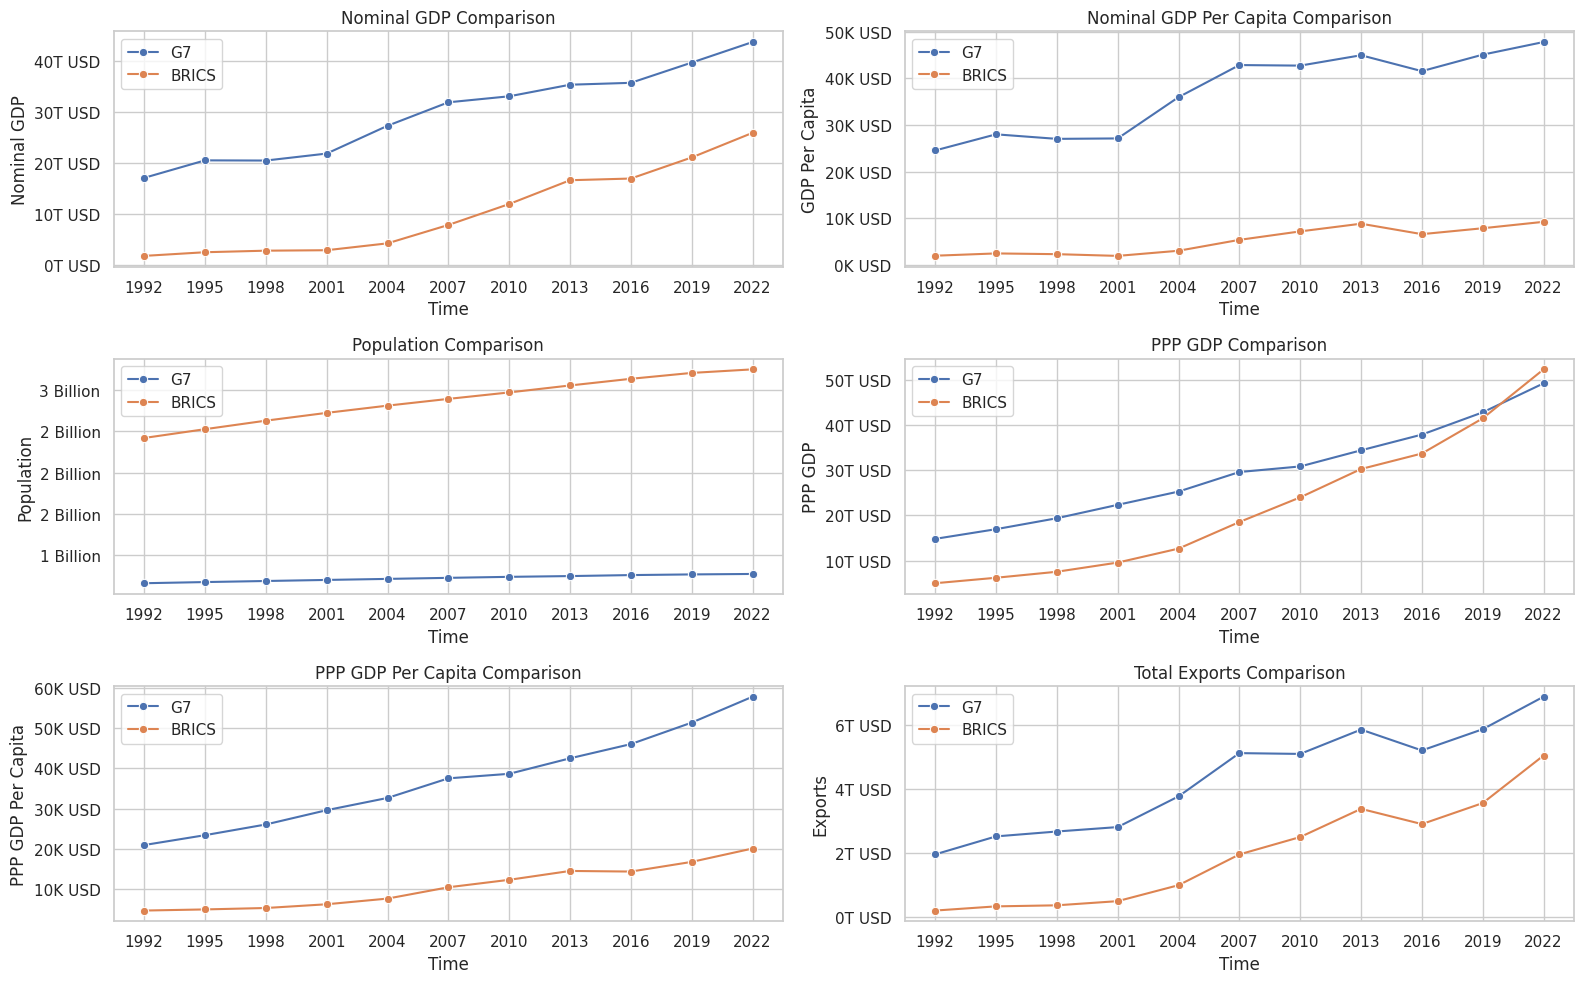

In [ ]:
# Set the style
sns.set(style="whitegrid")

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(16, 10))
plt.subplots_adjust(hspace=0.4)

# Formatter functions for y-axis ticks
def trillions_formatter(x, pos):
  return f'{x/1e12:.0f}T USD'

def thousands_formatter(x, pos):
  return f'{x/1e3:.0f}K USD'

def billions_formatter(x,pos):
  return f'{x/1e9:.0f} Billion'

# Plot Nominal GDP comparison
sns.lineplot(data=g7_aggregated, x='Time', y='Nominal_GDP', marker='o', ax=axes[0, 0], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='Nominal_GDP', marker='o', ax=axes[0, 0], label='BRICS')
axes[0, 0].set_title('Nominal GDP Comparison')
axes[0, 0].set_ylabel('Nominal GDP')
axes[0, 0].yaxis.set_major_formatter(FuncFormatter(trillions_formatter))

# Plot Nominal GDP Per Capita comparison
sns.lineplot(data=g7_aggregated, x='Time', y='Nominal_GDP_Per_Capita', marker='o', ax=axes[0, 1], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='Nominal_GDP_Per_Capita', marker='o', ax=axes[0, 1], label='BRICS')
axes[0, 1].set_title('Nominal GDP Per Capita Comparison')
axes[0, 1].set_ylabel('GDP Per Capita')
axes[0, 1].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Plot Population comparison
sns.lineplot(data=g7_aggregated, x='Time', y='Population', marker='o', ax=axes[1, 0], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='Population', marker='o', ax=axes[1, 0], label='BRICS')
axes[1, 0].set_title('Population Comparison')
axes[1, 0].set_ylabel('Population')
axes[1, 0].yaxis.set_major_formatter(FuncFormatter(billions_formatter))

# Plot PPP GDP comparison
sns.lineplot(data=g7_aggregated, x='Time', y='PPP_GDP', marker='o', ax=axes[1, 1], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='PPP_GDP', marker='o', ax=axes[1, 1], label='BRICS')
axes[1, 1].set_title('PPP GDP Comparison')
axes[1, 1].set_ylabel('PPP GDP')
axes[1, 1].yaxis.set_major_formatter(FuncFormatter(trillions_formatter))

# Plot PPP GDP Per Capita comparison
sns.lineplot(data=g7_aggregated, x='Time', y='GDP_PPP_Per_Capita', marker='o', ax=axes[2,0], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='GDP_PPP_Per_Capita', marker='o', ax=axes[2,0], label='BRICS')
axes[2,0].set_title('PPP GDP Per Capita Comparison')
axes[2,0].set_ylabel('PPP GDP Per Capita')
axes[2,0].yaxis.set_major_formatter(FuncFormatter(thousands_formatter))

# Plot Exports comparison
sns.lineplot(data=g7_aggregated, x='Time', y='Total_Exports', marker='o', ax=axes[2, 1], label='G7')
sns.lineplot(data=brics_aggregated, x='Time', y='Total_Exports', marker='o', ax=axes[2, 1], label='BRICS')
axes[2, 1].set_title('Total Exports Comparison')
axes[2, 1].set_ylabel('Exports')
axes[2, 1].yaxis.set_major_formatter(FuncFormatter(trillions_formatter))

# Add legend
for ax in axes.flatten():
    ax.legend()

# Show the plots
plt.tight_layout()
plt.show()

**Visualizing the compariosn amongst the countries in their respective groups**

In [ ]:
def plot_treemap(data, title, colors):

    """
    Plot treemap visualization.

    Args:
        data (pd.DataFrame): The data to be plotted.
        title (string): Mapping of old column names to new column names.
        colors (list[strings]): List of colors to be used for plotting.

    Returns:
        pd.DataFrame: Preprocessed DataFrame.
    """

    labels = data['Country']
    sizes = data['Nominal_GDP']
    percentages = (sizes / sizes.sum()) * 100

    plt.figure(figsize=(10, 6))
    squarify.plot(sizes=sizes, label=[f'{label}\n{percentage:.2f}%' for label, percentage in zip(labels, percentages)], color=colors, alpha=0.7)
    plt.title(title)
    plt.axis('off')
    plt.show()

# Custom colors for the treemap
g7_colors = ['skyblue', 'orange', 'lightgreen', 'lightcoral', 'lightsalmon', 'silver', 'gold']
brics_colors = ['blue', 'red', 'green', 'purple', 'orange']



In [ ]:
# Get data of G7 & BRICS countries for the year 2022.
df_g7_2022 = data_G7[data_G7['Time'] == '2022']
df_BRICS_2022 = data_BRICS[data_BRICS['Time'] == '2022']

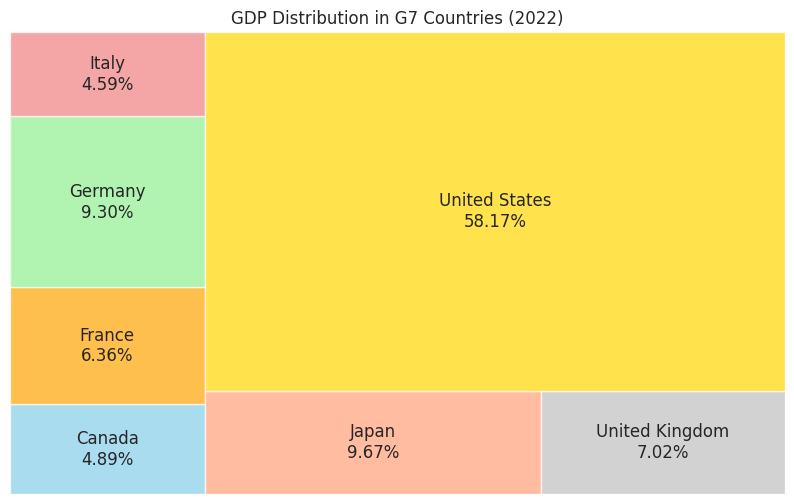

In [ ]:
# Plot treemap for G7
plot_treemap(df_g7_2022, 'GDP Distribution in G7 Countries (2022)', g7_colors)

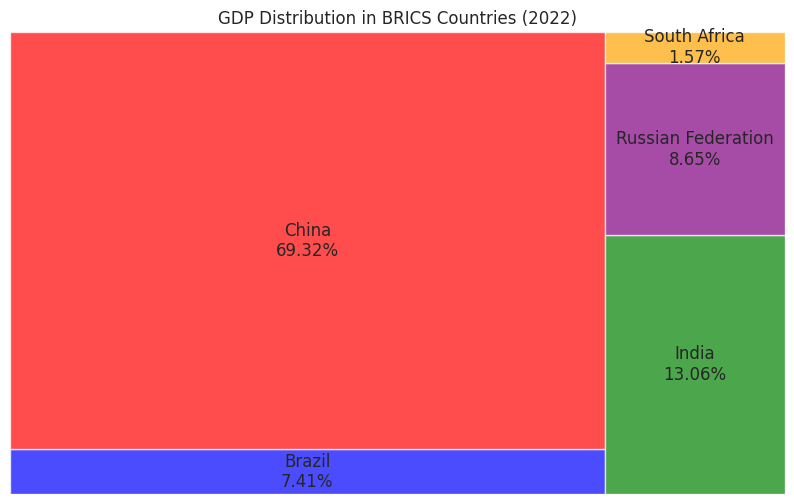

In [ ]:
# Plot treemap for BRICS
plot_treemap(df_BRICS_2022, 'GDP Distribution in BRICS Countries (2022)', brics_colors)

In [ ]:
# Define x-axis and y-axis labels for Plotly charts
x_label = 'Time'
y_label = 'Nominal_GDP'

# Create Plotly line charts for G7 Nominal GDP Over Time
fig = px.line(data_G7, x=x_label, y=y_label, color='Country', title='Nominal GDP Over Time (G7)')
fig.show()

# Create Plotly line charts for BRICS Nominal GDP Over Time
fig = px.line(data_BRICS, x=x_label, y=y_label, color='Country', title='Nominal GDP Over Time (BRICS)')
fig.show()

In [ ]:
# Define x-axis and y-axis labels for Plotly bar charts
x_label = 'Time'
y_label = 'PPP_GDP'
# Plot line chart for G7 Purchasing Power Parity GDP Over Time
fig = px.line(data_G7, x=x_label, y=y_label, color='Country', title=' GDP PPP Over Time (G7)')
fig.show()

# Plot line chart for BRICS Purchasing Power Parity GDP Over Time
fig = px.line(data_BRICS, x=x_label, y= y_label, color='Country', title=' GDP PPP Over Time (BRICS)')
fig.show()


In [ ]:
# Define x-axis and y-axis labels for Plotly bar charts
x_label = 'Country'
y_label = 'GDP_PPP_Per_Capita'

# Create animated bar chart for G7 Purchasing Power Parity GDP Per Capita Over Time
fig = px.bar(data_G7, x=x_label, y=y_label,title='Purchasing Power Parity GDP Per Capita (G7)', range_y=[0,80000], animation_frame='Time')
fig.show()
# Create animated bar chart for BRICS Purchasing Power Parity GDP Per Capita Over Time
fig = px.bar(data_BRICS, x=x_label, y=y_label, title='Purchasing Power Parity GDP Per Capita (BRICS)', range_y=[0, 40000], animation_frame='Time')
fig.show()

In [ ]:
# Define x-axis and y-axis labels for Plotly bar charts
x_label = 'Country'
y_label = 'Total_Exports'

# Create animated bar chart for G7 Total Exports Over Time
fig = px.bar(data_G7, x=x_label, y=y_label, title='Total Exports Over Time (G7)', range_y=[0, 2500000000000], animation_frame='Time')
fig.show()

# Create animated bar chart for BRICS Total Exports Over Time
fig = px.bar(data_BRICS, x=x_label, y=y_label, title='Total Exports Over Time (BRICS)', range_y=[0, 3500000000000], animation_frame='Time')
fig.show()